In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
asso2 = pd.read_pickle('/data/ana_am_asso_2')
asso50 = pd.read_pickle('/data/ana_am_asso_50')

In [3]:
asso2

,Before,After,File name,elimi
154,"{'decay_tau': 1.97955622591, 'x': [1, 2, 3, 4,...","{'decay_tau': 1.87496826594, 'x': [1, 2, 3, 4,...",2017121201,20
155,"{'decay_tau': 2.42385640047, 'x': [1, 2, 3, 4,...","{'decay_tau': 1.48075798983, 'x': [1, 2, 3, 4,...",2017121501,30
158,"{'decay_tau': 2.41509576872, 'x': [1, 2, 3, 4,...","{'decay_tau': 2.70412144559, 'x': [1, 2, 3, 4,...",2017122701,20
159,"{'decay_tau': 2.04739674322, 'x': [1, 2, 3, 4,...","{'decay_tau': 1.67478138461, 'x': [1, 2, 3, 4,...",2017122801,40
160,"{'decay_tau': 2.49982379279, 'x': [1, 2, 3, 4,...","{'decay_tau': 2.22935431123, 'x': [1, 2, 3, 4,...",2017122902,25
161,"{'decay_tau': 1.36414458304, 'x': [1, 2, 3, 4,...","{'decay_tau': 1.62788415779, 'x': [1, 2, 3, 4,...",2017122903,25
163,"{'decay_tau': 2.50469153002, 'x': [1, 2, 3, 4,...","{'decay_tau': 1.88476726745, 'x': [1, 2, 3, 4,...",2018012902,23


In [4]:
asso50

,Before,After,File name,elimi
165,"{'decay_tau': 2.86280215852, 'x': [1, 2, 3, 4,...","{'decay_tau': 3.23170200771, 'x': [1, 2, 3, 4,...",2018021301,24
166,"{'decay_tau': 2.23234579537, 'x': [1, 2, 3, 4,...","{'decay_tau': 2.53472628505, 'x': [1, 2, 3, 4,...",2018021302,28
167,"{'decay_tau': 2.53377170695, 'x': [1, 2, 3, 4,...","{'decay_tau': 2.84255814378, 'x': [1, 2, 3, 4,...",2018021303,24
168,"{'decay_tau': 2.44395935346, 'x': [1, 2, 3, 4,...","{'decay_tau': 2.59052096213, 'x': [1, 2, 3, 4,...",2018022801,30
169,"{'decay_tau': 2.03060915439, 'x': [1, 2, 3, 4,...","{'decay_tau': 1.71775386153, 'x': [1, 2, 3, 4,...",2018022802,27
170,"{'decay_tau': 2.71429467816, 'x': [1, 2, 3, 4,...","{'decay_tau': 3.00121610476, 'x': [1, 2, 3, 4,...",2018030101,24
171,"{'decay_tau': 3.64844213914, 'x': [1, 2, 3, 4,...","{'decay_tau': 3.14574164693, 'x': [1, 2, 3, 4,...",2018030102,20


/src/Patch_ana/Patch_ana/patch_pip.py:517: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

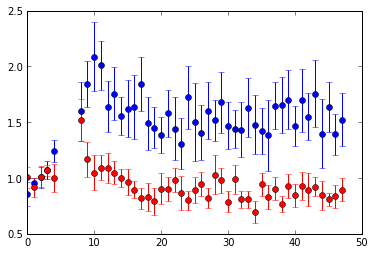

In [5]:
ave_ptl_resp = np.ones((len(asso2), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2,ave_ptl_2  = patch_pip.samp_ave(asso2, ave_ptl_resp)
ave_ptl_mean_2 = ave_ptl_mean_2[:-12]
ave_ptl_ste_2 = ave_ptl_ste_2[:-12]
ave_ptl_2 = ave_ptl_2[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

ave_ptl_resp = np.ones((len(asso50), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50, ave_ptl_50 = patch_pip.samp_ave(asso50, ave_ptl_resp)
ave_ptl_mean_50 = ave_ptl_mean_50[:-12]
ave_ptl_ste_50 = ave_ptl_ste_50[:-12]
ave_ptl_50 = ave_ptl_50[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ro')

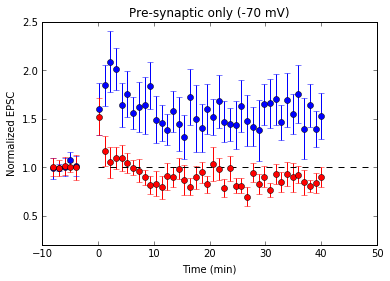

In [40]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_2cp) - 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(asso2)))

ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste= patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_50cp)- 6 * 4/3, len(ave_ptl_mean_50cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(asso50)))

plt.plot(np.ones((50))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
# plt.legend()
plt.ylim([0.2, 2.5])
plt.title('Pre-synaptic only (-70 mV)')
with PdfPages('/data/Figure4_8.pdf') as pdf:
    pdf.savefig()

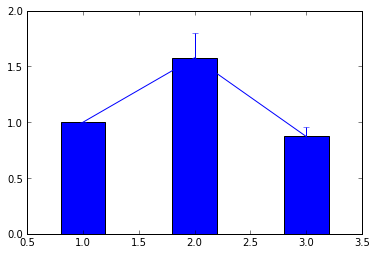

In [41]:
# Compare amplitude
mean_amp_aft_2Hz = np.nanmean(np.nanmean(ave_ptl_2[:, -10:], axis=1))
mean_amp_aft_50Hz = np.nanmean(np.nanmean(ave_ptl_50[:, -10:], axis=1))

std_amp_aft_2Hz = np.nanstd(np.nanmean(ave_ptl_2[:, -10:], axis=1))/np.sqrt(6)
std_amp_aft_50Hz = np.nanstd(np.nanmean(ave_ptl_50[:, -10:], axis=1))/np.sqrt(6)
plt.bar([1,2,3], [1, mean_amp_aft_2Hz, mean_amp_aft_50Hz], align='center', width=0.4)
plt.errorbar(x=[1,2,3], y=[1, mean_amp_aft_2Hz, mean_amp_aft_50Hz],yerr = [0, std_amp_aft_2Hz, std_amp_aft_50Hz], fmt='')
plt.ylim([0,2])
with PdfPages('/data/Figure4_9.pdf') as pdf:
    pdf.savefig()

(0, 3)

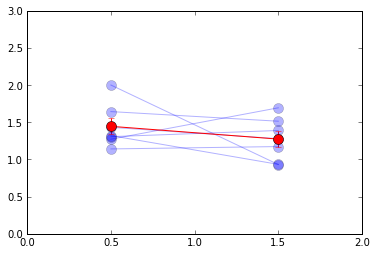

In [8]:
# Compare PPR
mean_PPR_bef = [np.nanmean(asso50['Before'].loc[i]['PPR']) for i in asso50['Before'].index]
mean_PPR_aft = [np.nanmean(asso50['After'].loc[i]['PPR'][-10:]) for i in asso50['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
# with PdfPages('/data/Supp1_1.pdf') as pdf:
#     pdf.savefig()

(0, 3.5)

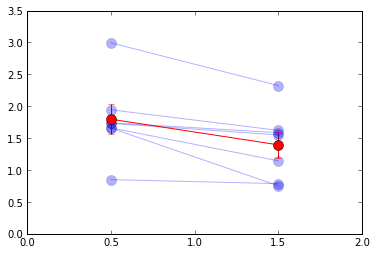

In [9]:
# Compare PPR
mean_PPR_bef = [np.nanmean(asso2['Before'].loc[i]['PPR']) for i in asso2['Before'].index]
mean_PPR_aft = [np.nanmean(asso2['After'].loc[i]['PPR'][-10:]) for i in asso2['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3.5])
# with PdfPages('/data/Supp1_2.pdf') as pdf:
#     pdf.savefig()

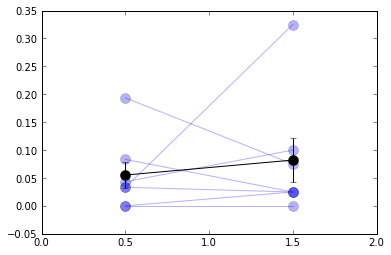

In [54]:
# Compare failure rate
mean_fail_bef = [np.sum(asso50['Before'].loc[i]['failure'])/len(asso50['Before'].loc[i]['failure']) for i in asso50['Before'].index]
mean_fail_aft = [np.sum(asso50['After'].loc[i]['failure'][-40:])/40 for i in asso50['After'].index]

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(len(mean_fail_bef))
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(len(mean_fail_bef))

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.35])

with PdfPages('/data/Figure4_6.pdf') as pdf:
    pdf.savefig()

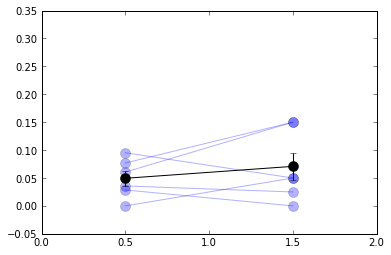

In [59]:
# Compare failure rate
mean_fail_bef = [np.sum(asso2['Before'].loc[i]['failure'])/len(asso2['Before'].loc[i]['failure']) for i in asso2['Before'].index]
mean_fail_aft = [np.sum(asso2['After'].loc[i]['failure'][-40:])/40 for i in asso2['After'].index]

mean_fail_bef.pop(1)
mean_fail_aft.pop(1)

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(len(mean_fail_bef))
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(len(mean_fail_bef))

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.35])

with PdfPages('/data/Figure4_7.pdf') as pdf:
    pdf.savefig()

In [12]:
asso2['Before'].index

Int64Index([154, 155, 158, 159, 160, 161, 163], dtype='int64')

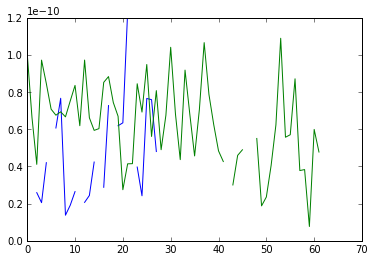

In [13]:
plt.plot(asso2['Before'].loc[154]['raw_amp1'])
plt.plot(asso2['After'].loc[154]['raw_amp1'])

In [20]:
pi_2

[1.2083242877363838,
 1.3827477872311491,
 1.6081126476883039,
 2.6210115752253986,
 0.98251573878067333,
 1.2226123032210983]

/src/Patch_ana/Patch_ana/patch_pip.py:517: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


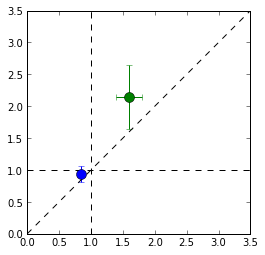

In [44]:
# CV analysis
r_50, pi_50 = patch_pip.cv_analysis(asso50, bef_len=15, aft_len=100)

plt.errorbar(np.mean(pi_50), np.mean(r_50), np.std(r_50)/np.sqrt(len(r_50)), np.std(pi_50)/np.sqrt(len(pi_50)),  'o', markersize=10)

# CV analysis
r_2, pi_2 = patch_pip.cv_analysis(asso2, bef_len=5, aft_len=100)
plt.errorbar(np.mean(pi_2), np.mean(r_2), np.std(r_2)/np.sqrt(len(r_2)), np.std(pi_2)/np.sqrt(len(pi_2)),  'o', markersize=10)
r_2.pop(0)
pi_2.pop(0)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
plt.axes().set_aspect('equal')
with PdfPages('/data/Figure4_12.pdf') as pdf:
    pdf.savefig()

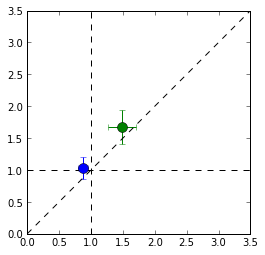

In [45]:
# CV analysis
cv_mean_bef = [np.nanmean(asso50['Before'].loc[i]['raw_amp1'][-20:]) for i in asso50['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_50[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_50.shape[0])]
               
cv_std_bef = [np.nanstd(asso50['Before'].loc[i]['raw_amp1'][-15:]) for i in asso50['Before'].index]
end_aft = [asso50['elimi'].values[i] for i in range(len(asso50))]
cv_std_aft = [np.nanstd(asso50['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-70,0):end_aft[k]*3]) for k,i in enumerate(asso50['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

# CV analysis
cv_mean_bef = [np.nanmean(asso2['Before'].loc[i]['raw_amp1'][-20:]) for i in asso2['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_2[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_2.shape[0])]
               
cv_std_bef = [np.nanstd(asso2['Before'].loc[i]['raw_amp1'][-15:]) for i in asso2['Before'].index]
end_aft = [asso2['elimi'].values[i] for i in range(len(asso2))]
cv_std_aft = [np.nanstd(asso2['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-70,0):end_aft[k]*3]) for k,i in enumerate(asso2['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]
r.pop(0)
pi.pop(0)

plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
#plt.xlim([0, 3.5])
#plt.ylim([0, 3.5])
plt.axes().set_aspect('equal')
with PdfPages('/data/Figure4_12.pdf') as pdf:
    pdf.savefig()

In [16]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(asso2)))
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(asso50)))
plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Associative dt = 0 ms ')
plt.axis([0,60,0.1,3])

NameError: name 'pro_bef' is not defined